# Myth: Forgetting rate always decreases after Study/Repetition

source: https://x.com/emollick/status/1634661880978366466

Truth: Forgetting rate only decreases after study/repetition if the student recalls the information correctly. If the student recalls the information incorrectly, the forgetting rate can actually increase.

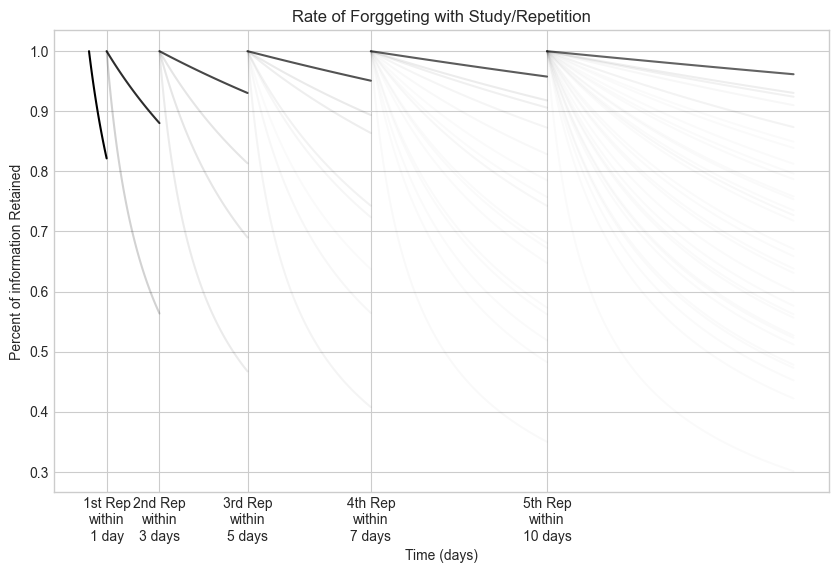

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import accumulate
from fsrs_optimizer import Collection, DEFAULT_WEIGHT, power_forgetting_curve


plt.style.use("seaborn-v0_8-whitegrid")
col = Collection(DEFAULT_WEIGHT)
schedules = [0, 1, 3, 5, 7, 10, 14]


rating_histories = [[1]]
percentages = [1]
fig, ax = plt.subplots(figsize=(10, 6))

while len(rating_histories) > 0:
    r_history = rating_histories.pop()
    alpha = percentages.pop()
    r_len = len(r_history)
    t_history = schedules[:r_len]
    accumulative_t = sum(t_history)
    next_t = schedules[r_len]
    stability = float(col.predict(",".join(map(str, t_history)), ",".join(map(str, r_history)))[0])
    x = np.linspace(0, next_t, 100)
    recall_rate = power_forgetting_curve(x, stability)
    ax.plot(accumulative_t+x, recall_rate, alpha=max(alpha, 0.02), color="black")
    if r_len < len(schedules) - 1:
        rating_histories.append(r_history + [3])
        percentages.append(alpha * recall_rate[-1])
        rating_histories.append(r_history + [1])
        percentages.append(alpha * (1-recall_rate[-1]))


def int_to_ordinal(n):
    if 10 <= (n % 100) <= 20:
        suffix = 'th'
    else:
        suffix_dict = {1: 'st', 2: 'nd', 3: 'rd'}
        suffix = suffix_dict.get(n % 10, 'th')
    return f"{n}{suffix}"


ax.set_title("Rate of Forggeting with Study/Repetition")
ax.set_xlabel("Time (days)")
ax.set_ylabel("Percent of information Retained")
ax.set_xticks(list(accumulate(schedules[1:-1])))
ax.set_xticklabels([f"{int_to_ordinal(i+1)} Rep\nwithin\n{t} {'day' if t == 1 else 'days'}" for i, t in enumerate(schedules[1:-1])])
fig.show()